In [1]:
import pandas as pd

In [54]:
data = pd.read_csv('final_data.csv').drop(columns=["Unnamed: 0"], axis=1)
data['label'] = (data['close'].shift(1) > data['close']) * 1
data

,date,open_x,high_x,low_x,close_x,volume_x,market cap_x,open_y,high_y,low_y,...,roc,rsi,r_50,hl_pct_change_5,cmf,T3,low_5,safe_dump_50,wprice,label
0,2015-11-15,0.8912,0.9215,0.8750,0.9064,4.118480e+05,6.774580e+07,1.0,1.0,1.0000,...,-14.500494,47.986181,-66.665400,0.146445,0.017273,333.471361,301.00,True,300.654281,0
1,2015-11-16,0.9062,0.9447,0.8920,0.9290,6.209450e+05,6.945801e+07,1.0,1.0,1.0000,...,-14.419892,50.903300,-62.643962,0.101225,0.026485,328.956688,301.00,True,300.969886,0
2,2015-11-17,0.9249,1.0300,0.9058,1.0100,1.145440e+06,7.539216e+07,1.0,1.0,1.0000,...,-10.252564,52.090292,-61.733477,0.079171,0.012844,327.028262,313.36,True,301.404360,0
3,2015-11-18,0.9932,1.0100,0.9405,0.9933,6.811040e+05,7.432077e+07,1.0,1.0,1.0000,...,-12.010204,51.934510,-61.925829,0.071067,0.004090,326.917383,315.90,True,301.763673,1
4,2015-11-19,0.9887,1.0100,0.9375,0.9555,4.435280e+05,7.151734e+07,1.0,1.0,1.0000,...,-3.167864,49.256687,-65.172732,0.071067,-0.035436,326.828088,315.90,True,302.068671,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2023-01-14,1451.4300,1563.7400,1450.9900,1550.7100,1.544463e+10,1.897660e+11,1.0,1.0,1.0000,...,24.586470,89.342983,-1.968685,0.227941,0.468759,18756.423324,17093.99,True,26923.873779,0
2618,2023-01-15,1550.7300,1556.9500,1520.8900,1552.4800,6.774614e+09,1.899829e+11,1.0,1.0,1.0000,...,23.176244,87.398282,-3.870844,0.215547,0.447934,19468.171193,17162.99,True,26921.508307,1
2619,2023-01-16,1552.5200,1594.0400,1529.5700,1576.8300,8.454485e+09,1.929632e+11,1.0,1.0,1.0000,...,24.857152,88.232537,-3.603991,0.187032,0.487565,20124.296268,17337.99,True,26918.364532,0
2620,2023-01-17,1577.1100,1594.0000,1553.3400,1567.8500,7.599463e+09,1.918634e+11,1.0,1.0,1.0000,...,23.815731,88.056261,-5.229787,0.143203,0.490496,20658.050508,17995.20,True,26915.489781,1


# Scaler

In [55]:
from sklearn.preprocessing import StandardScaler

y = data.pop('label')
X = data

scale = StandardScaler()
x = scale.fit_transform(X.iloc[:, 1:])
x = pd.DataFrame(x , columns=X.columns[1:])

# Random Forest

Elapsed time to compute the importances: 0.008 seconds


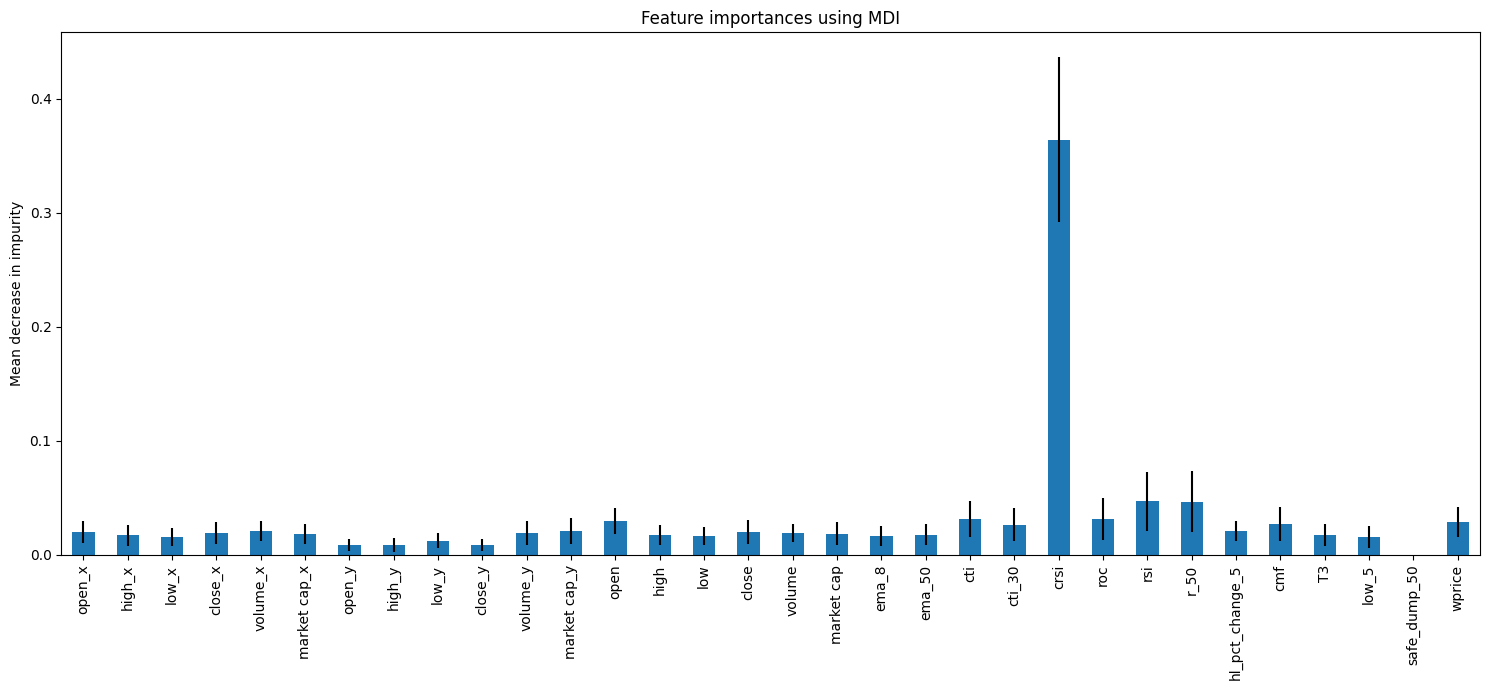

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feature_names = x.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(x, y)

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
fig.set_size_inches(15,7)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



# Patterns

### 1: btc price trend

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X.iloc[: , 1:])
scaled_x = pd.DataFrame(scaled_x , columns=X.columns[1:])

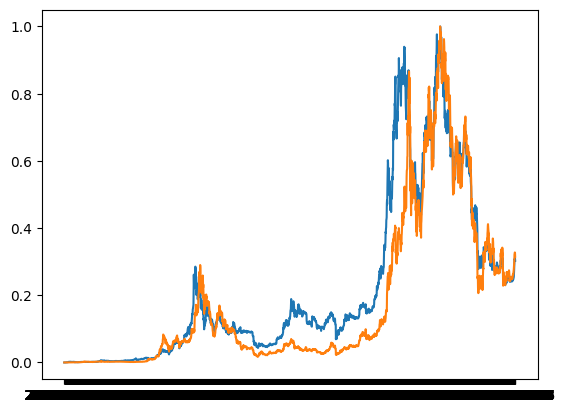

In [6]:
plt.plot(X.date , scaled_x.close)
plt.plot(X.date, scaled_x.close_x)



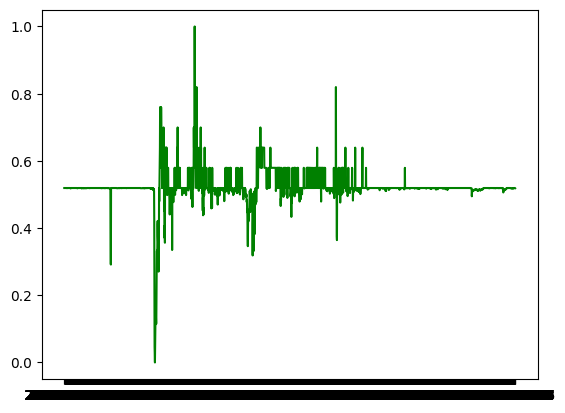

In [7]:
plt.plot(X.date, scaled_x.close_y , color= 'g')


### 2: candle stick

In [8]:
X.date = pd.to_datetime(X.date)


In [9]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        'volume': 'sum'
    })

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open'],
                high=df_n['high'],
                low=df_n['low'],
                close=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1 month')
fig.show()

In [11]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_x": "first",
        "high_x": "max",
        "low_x": "min",
        "close_x": "last",
        'volume_x': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_x'],
                high=df_n['high_x'],
                low=df_n['low_x'],
                close=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='ete 1 month')
fig.show()

In [12]:
df_n = X.set_index('date')
df_n = df_n.resample("1M").agg({
        "open_y": "first",
        "high_y": "max",
        "low_y": "min",
        "close_y": "last",
        'volume_y': 'sum'
    })

fig = go.Figure(data=[go.Candlestick(x=df_n.index,
                open=df_n['open_y'],
                high=df_n['high_y'],
                low=df_n['low_y'],
                close=df_n['close_y'])])

fig.update_layout(plot_bgcolor="white", title_text='ete 1 month')
fig.show()

### pattern 3:

In [18]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\4210659882.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [19]:
l_period = len(df_n)
pattern = df_n['close'].values

In [31]:
def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

In [30]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    minimum = 9999
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d < minimum:
            minimum = d
            start = i
            end = i+l_period
    return minimum, start, end

In [20]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {minimum}")

max similarity of 2022-11-12 00:00:00 -- 2022-12-14 00:00:00: 0.22884904135021078


In [25]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-11-12'][df_n['date'] <= '2022-12-14'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\680772997.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\680772997.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
minimum, start, end = similarity_fun(calc_mape, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {minimum}")

max similarity of 2018-02-01 00:00:00 -- 2018-03-05 00:00:00: 0.8150529809342746


In [34]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2018-02-01'][df_n['date'] <= '2018-03-05'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\798748724.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\798748724.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [36]:
def similarity_fun(metric, pattern2):
    l = range(len(pattern2) - l_period)
    maximum = -2
    start = -1
    end = -1
    for i in l:
        d = metric(pattern, pattern2[i: i+l_period])
        if d > maximum:
            maximum = d
            start = i
            end = i+l_period
    return maximum, start, end

def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)

    numerator = np.sum(a_diff * p_diff)

    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

In [37]:
df_n = x
df_n['date'] = X.date
df_2 = df_n[df_n['date'] < '2022-12-18'].reset_index().drop(['index'], axis=1)
pattern2 = df_2['close'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_2['date'].iat[start]} -- {df_2['date'].iat[end]}: {maximum}")

max similarity of 2020-07-02 00:00:00 -- 2020-08-03 00:00:00: 0.9760954125842528


In [38]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-07-02'][df_n['date'] <= '2020-08-03'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\3497908144.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\3497908144.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [40]:
df_n = x
df_n['date'] = X.date
pattern2 = df_n['close_x'].values
maximum, start, end = similarity_fun(calc_correlation, pattern2)

print(f"max similarity of {df_n['date'].iat[start]} -- {df_n['date'].iat[end]}: {maximum}")

max similarity of 2020-12-10 00:00:00 -- 2021-01-11 00:00:00: 0.973527337713697


In [42]:
df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2022-12-18'][df_n['date'] <= '2023-01-18'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-01-01 -- 2019-02-01')
fig.show()

df_n = x
df_n['date'] = X.date
df_n = df_n[df_n['date'] >= '2020-12-10'][df_n['date'] <= '2021-01-11'].reset_index().drop(['index'], axis=1)
fig = go.Figure(data=[go.Scatter(x=df_n['date'],
                y=df_n['close_x'])])

fig.update_layout(plot_bgcolor="white", title_text='bitcoin 1m scaled close price of 2019-02-14 -- 2019-03-17')
fig.show()

C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\522092708.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\Keyhan\AppData\Local\Temp\ipykernel_376\522092708.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Feature Selection

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features 
# df.drop(to_drop, axis=1, inplace=True)
to_drop


['high_x',
 'low_x',
 'close_x',
 'market cap_x',
 'high',
 'low',
 'close',
 'market cap',
 'ema_8',
 'T3',
 'low_5']

In [57]:
x.drop(['high_x' , 'low_x' , 'high' , 'low'], axis=1, inplace=True)

In [58]:
x.dtypes

open_x             float64
close_x            float64
volume_x           float64
market cap_x       float64
open_y             float64
high_y             float64
low_y              float64
close_y            float64
volume_y           float64
market cap_y       float64
open               float64
close              float64
volume             float64
market cap         float64
ema_8              float64
ema_50             float64
cti                float64
cti_30             float64
crsi               float64
roc                float64
rsi                float64
r_50               float64
hl_pct_change_5    float64
cmf                float64
T3                 float64
low_5              float64
safe_dump_50       float64
wprice             float64
dtype: object

# Logistic Regression

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
train_ratio = 0.9
l = int(train_ratio * len(x))
x_train = x.iloc[:l]
y_train = y.iloc[:l]
x_test = x.iloc[l:]
y_test = y.iloc[l:]

In [62]:
model = LogisticRegression(solver='liblinear', random_state=0)



In [63]:
model.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [69]:
y_train.value_counts()

0    1291
1    1068
Name: label, dtype: int64

In [64]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       124
           1       1.00      0.09      0.16       139

    accuracy                           0.52       263
   macro avg       0.75      0.54      0.41       263
weighted avg       0.76      0.52      0.40       263



# SVM

In [70]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [71]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       124
           1       1.00      0.11      0.19       139

    accuracy                           0.53       263
   macro avg       0.75      0.55      0.43       263
weighted avg       0.76      0.53      0.42       263



# Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [74]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       124
           1       0.96      0.86      0.90       139

    accuracy                           0.90       263
   macro avg       0.91      0.91      0.90       263
weighted avg       0.91      0.90      0.90       263



# KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
y_pred = nbrs.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [77]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.57      0.93      0.70       124
           1       0.85      0.37      0.51       139

    accuracy                           0.63       263
   macro avg       0.71      0.65      0.61       263
weighted avg       0.72      0.63      0.60       263

